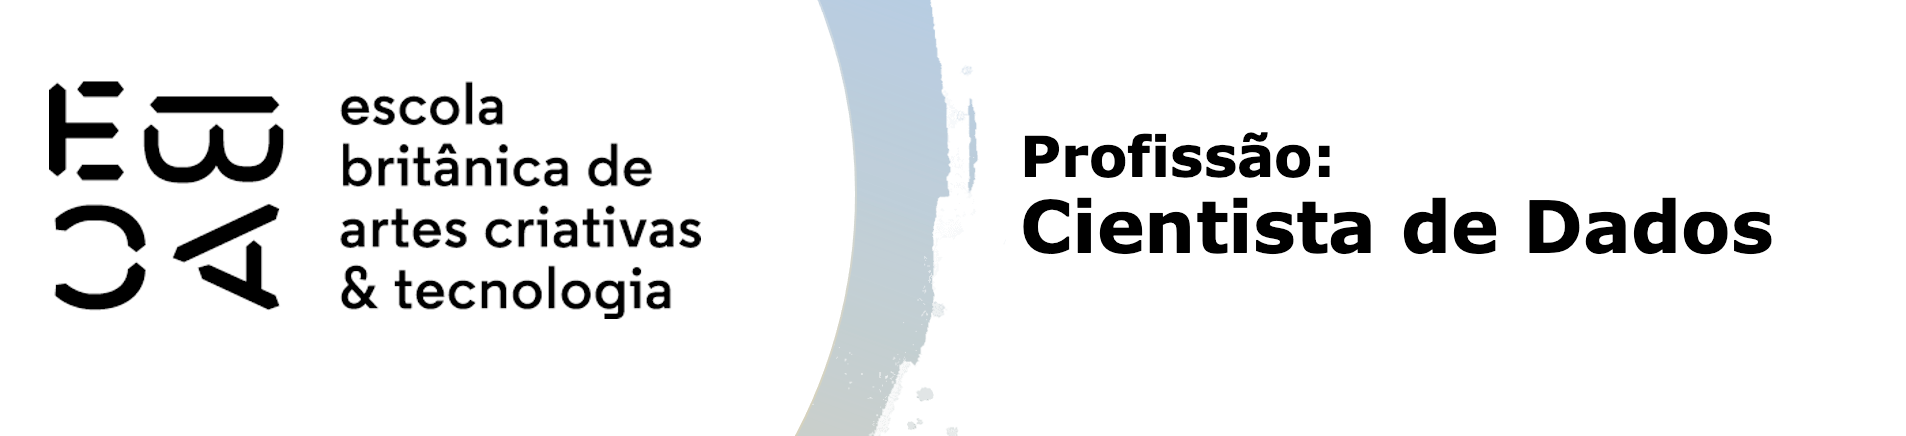

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from gower import gower_matrix
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
variaveis = df.columns.values[:-1]
num_vars = df.select_dtypes(include='number').dropna().columns[:-5]
cat_vars = ['SpecialDay', 'Weekend', 'Month']

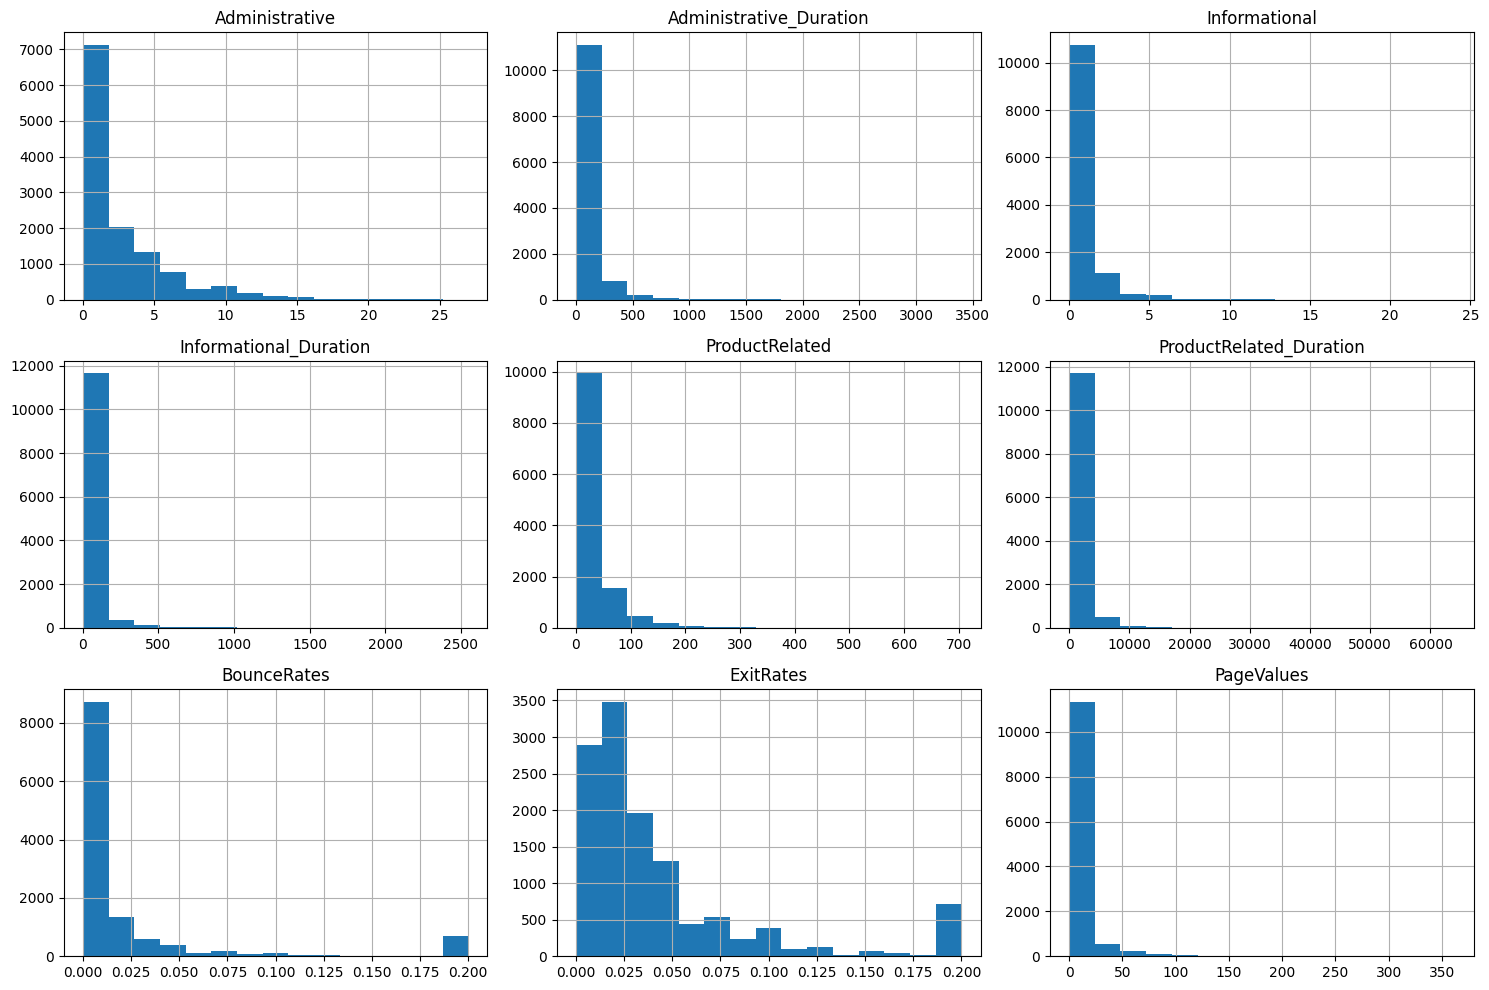

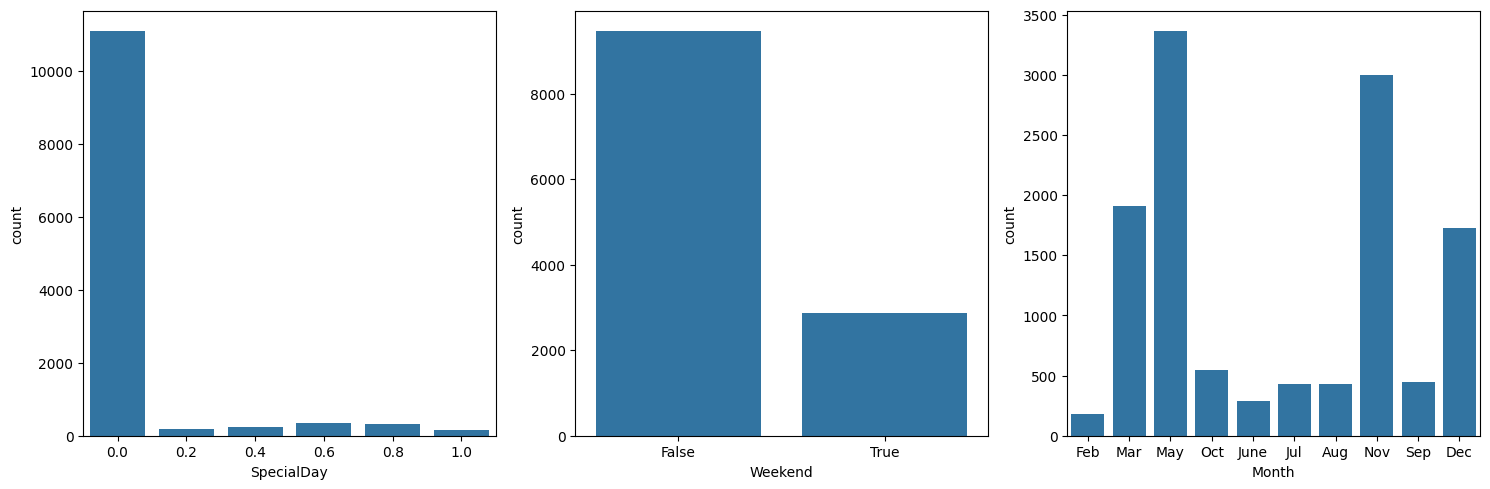

In [7]:
# Visualização da distribuição das variáveis numéricas
df[num_vars].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

# Visualização da contagem das variáveis categóricas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(cat_vars):
    sns.countplot(ax=axes[i], x=df[var])
plt.tight_layout()
plt.show()


In [8]:
# Verificando presença de missing
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Não há dados faltantes

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [9]:
# Variáveis que descrevem o padrão de navegação na sessão
vars_nav = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [10]:
# Variáveis que indicam a característica da data
vars_dat = ['SpecialDay', 'Weekend', 'Month']

In [11]:
# Padronização das variáveis numéricas
df_pad = pd.DataFrame(StandardScaler().fit_transform(df[vars_nav]), columns = df[vars_nav].columns)

In [12]:
df_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430


In [13]:
df_pad[vars_dat] = df[vars_dat]

In [14]:
df_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay,Weekend,Month
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.0,False,Feb
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0.0,False,Feb
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0.0,False,Feb
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.0,False,Feb
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0.0,True,Feb
...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,0.0,True,Dec
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,0.0,True,Nov
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,0.0,True,Nov
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,0.0,False,Nov


In [15]:
df2 = pd.get_dummies(df_pad.dropna(), columns=vars_dat)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [16]:
df2.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'SpecialDay_0.0', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
       'SpecialDay_1.0', 'Weekend_False', 'Weekend_True', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'], dtype=object)

In [17]:
vars_dat = [True if x in {'SpecialDay_0.0', 'SpecialDay_0.2',
       'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8',
       'SpecialDay_1.0', 'Weekend_False', 'Weekend_True', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'} else False for x in df2.columns]

In [18]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [20]:
distancia_gower = gower_matrix(df2, cat_features=vars_dat)


In [21]:
gdv = squareform(distancia_gower,force='tovector')
gdv.shape

(76008285,)

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [22]:
Z = linkage(gdv, method='complete')

In [23]:
df2['grupos_3'] = fcluster(Z, 3, criterion='maxclust')
df3 = df.join(df2['grupos_3'], how='left')
# Renomeado os clusters
df3['grupos_3'] = df3['grupos_3'].replace({1: "grupo_1", 3: "grupo_3", 2: "grupo_2"})
# Para 4 grupos 
df2['grupos_4'] = fcluster(Z, 4, criterion='maxclust')
df3 = df3.join(df2['grupos_4'], how='left')
df3['grupos_4'] = df3['grupos_4'].replace({1: "grupo_1", 4: "grupo_4", 3: "grupo_3", 2: "grupo_2"})

# Contagem das observações em cada grupo
print(df2['grupos_3'].value_counts())
print(df2['grupos_4'].value_counts())


grupos_3
2    6657
1    2840
3    2833
Name: count, dtype: int64
grupos_4
2    6657
1    2840
3    2649
4     184
Name: count, dtype: int64


Leaves for 3-group dendrogram = 11468


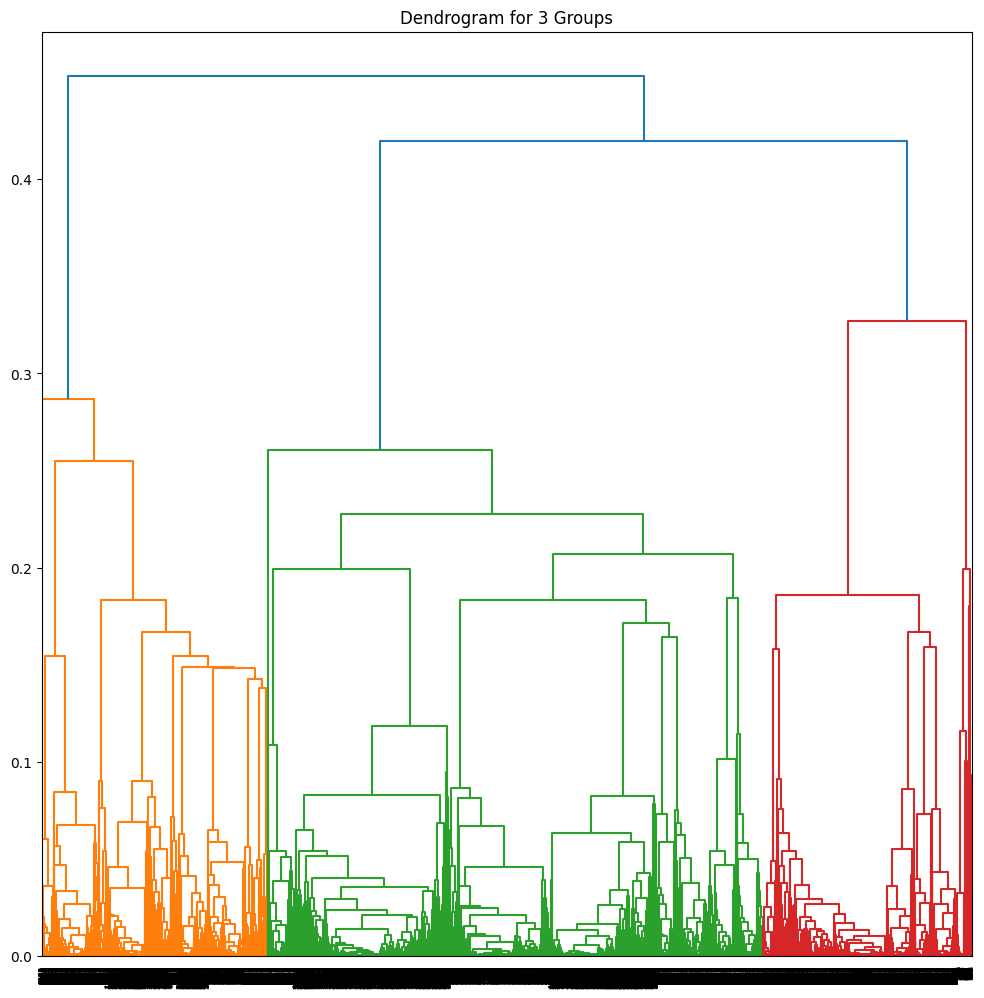

In [24]:
# Plot # Plot do dendrograma para 3 grupos
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
dn3 = dendrogram(Z, truncate_mode='level', p=30, show_leaf_counts=True, ax=axs, color_threshold=Z[-(3-1), 2])  # Cutting at the height of the second last merge for 3 groups
print(f"Leaves for 3-group dendrogram = {len(dn3['leaves'])}")
plt.title('Dendrogram for 3 Groups')
plt.show()

In [28]:
# Contagem das observações em cada grupo para 3 clusters
contagem_grupos_3 = df2['grupos_3'].value_counts()
print("Contagem de observações para 3 clusters:")
print(contagem_grupos_3)

Contagem de observações para 3 clusters:
grupos_3
2    6657
1    2840
3    2833
Name: count, dtype: int64


Leaves for 4-group dendrogram = 11468


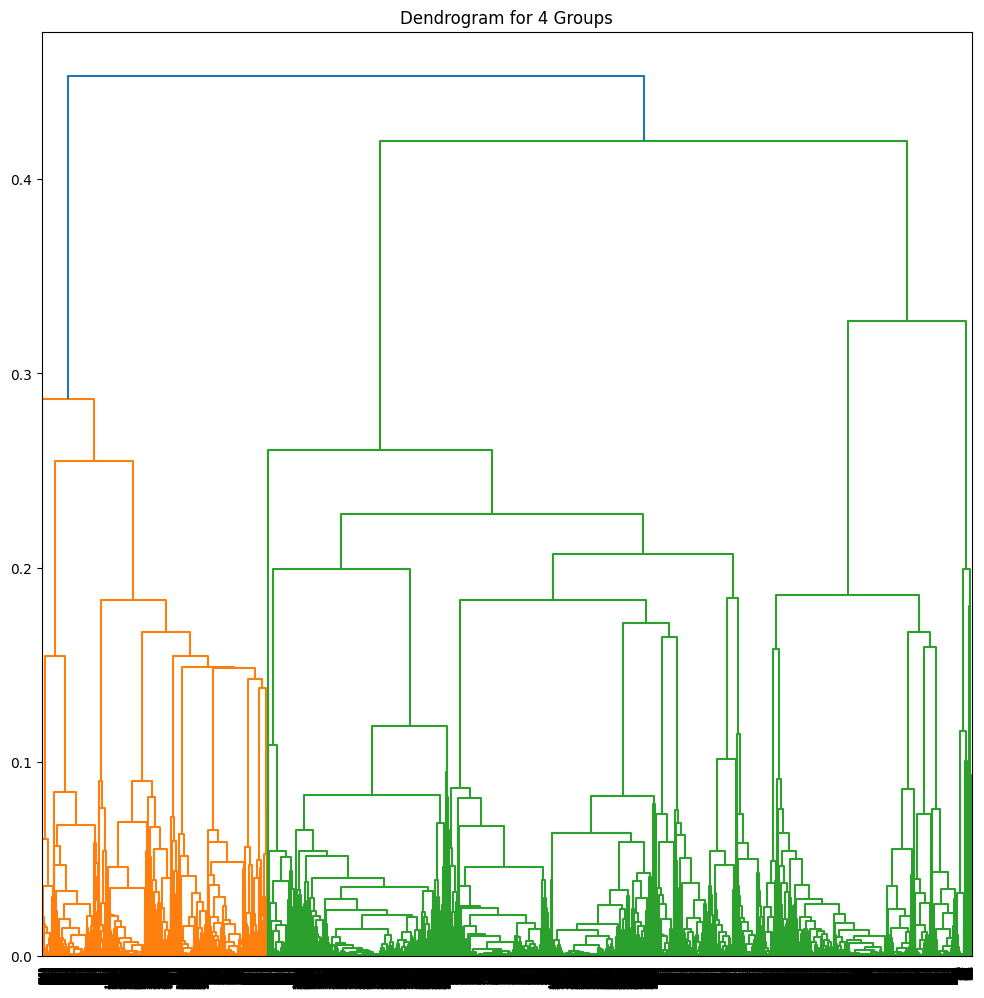

In [25]:
# Plot do dendrograma para 4 grupos
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
dn4 = dendrogram(Z, truncate_mode='level', p=30, show_leaf_counts=True, ax=axs, color_threshold=max(Z[-4:, 2]))
print(f"Leaves for 4-group dendrogram = {len(dn4['leaves'])}")
plt.title('Dendrogram for 4 Groups')
plt.show()

In [29]:
# Contagem das observações em cada grupo para 3 clusters
contagem_grupos_4 = df2['grupos_4'].value_counts()
print("Contagem de observações para 4 clusters:")
print(contagem_grupos_4)

Contagem de observações para 4 clusters:
grupos_4
2    6657
1    2840
3    2649
4     184
Name: count, dtype: int64


Os resultados da análise dos agrupamentos hierárquicos revelam que os Grupos 1 e 2 são altamente consistentes entre os agrupamentos de 3 e 4 clusters, com contagens idênticas de observações (2840 e 6657, respectivamente). Isso indica que esses grupos têm uma estrutura sólida e bem definida, que não se altera mesmo quando o número de clusters aumenta. No entanto, o Grupo 3, que inicialmente contém 2833 observações no agrupamento de 3 clusters, é dividido em dois subgrupos distintos quando o número de clusters é aumentado para 4, resultando em 2649 observações no novo Grupo 3 e 184 observações no novo Grupo 4.

Essa divisão sugere que o algoritmo de clustering hierárquico identificou uma subestrutura dentro do Grupo 3 original, que se tornou aparente apenas quando se permitiu um nível mais detalhado de agrupamento. Em essência, a maior parte do Grupo 3 original permaneceu coesa, mas uma pequena fração foi suficientemente diferente para formar um grupo separado.

In [27]:
# Tabela cruzada para ver a relação entre os clusters de 3 grupos e os clusters de 4 grupos.
crosstab_result = pd.crosstab(df3['grupos_3'], df3['grupos_4'], rownames=['3-group clusters'], colnames=['4-group clusters'])
crosstab_result

4-group clusters,grupo_1,grupo_2,grupo_3,grupo_4
3-group clusters,,,,
grupo_1,2840,0,0,0
grupo_2,0,6657,0,0
grupo_3,0,0,2649,184


### Análise Crítica da Tabela Cruzada

A análise da tabela cruzada confirma a robustez e a coerência dos Grupos 1 e 2, enquanto revela uma subestrutura mais complexa no Grupo 3. A divisão do Grupo 3 no agrupamento de 4 clusters é esperada e mostra a capacidade do algoritmo de clustering hierárquico de detectar e diferenciar subgrupos menores dentro de grupos maiores. Essa observação é crucial para entender a heterogeneidade dos dados e para tomar decisões mais informadas sobre a segmentação ou a análise de subgrupos específicos. A visualização do dendrograma pode fornecer insights adicionais sobre as alturas das divisões e a similaridade entre os diferentes grupos.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

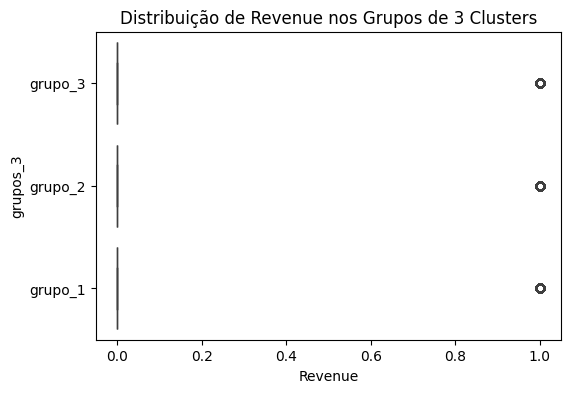

In [30]:
# Boxplot para a variável 'Revenue' nos grupos de 3 clusters
plt.figure(figsize=(6, 4))
sns.boxplot(data=df3, y='grupos_3', x=df['Revenue'])
plt.title('Distribuição de Revenue nos Grupos de 3 Clusters')
plt.show()

In [31]:
# Crosstab para 'Revenue' nos grupos de 3 clusters
pd.crosstab(df['Revenue'], df3['grupos_3'])

grupos_3,grupo_1,grupo_2,grupo_3
Revenue,,,
False,2342,5516,2564
True,498,1141,269


<Axes: xlabel='BounceRates', ylabel='grupos_3'>

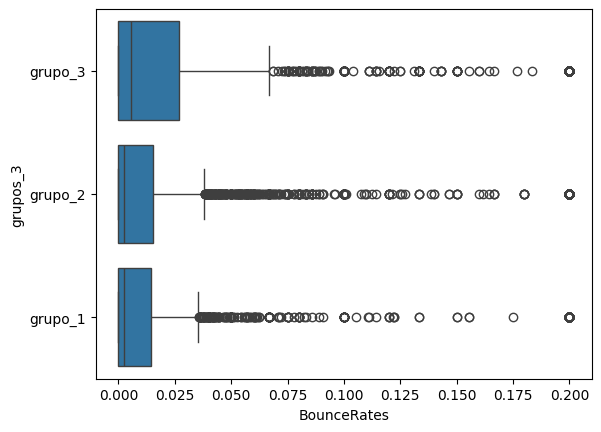

In [26]:
sns.boxplot(data=df3, y='grupos_3', x='BounceRates')

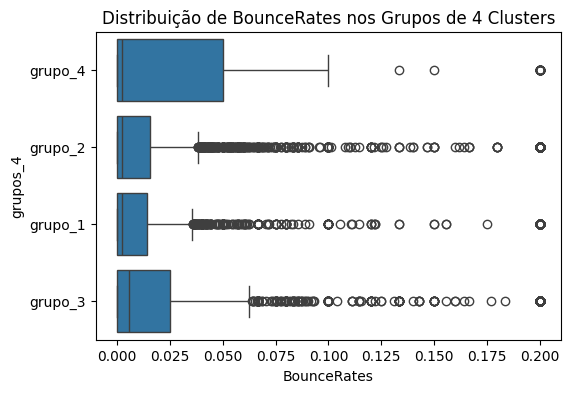

In [32]:
# Boxplot para a variável 'BounceRates' nos grupos de 4 clusters
plt.figure(figsize=(6, 4))
sns.boxplot(data=df3, y='grupos_4', x=df['BounceRates'])
plt.title('Distribuição de BounceRates nos Grupos de 4 Clusters')
plt.show()


In [33]:
# Crosstab para 'Revenue' nos grupos de 4 clusters
pd.crosstab(df['Revenue'], df3['grupos_4'])

grupos_4,grupo_1,grupo_2,grupo_3,grupo_4
Revenue,,,,
False,2342,5516,2383,181
True,498,1141,266,3


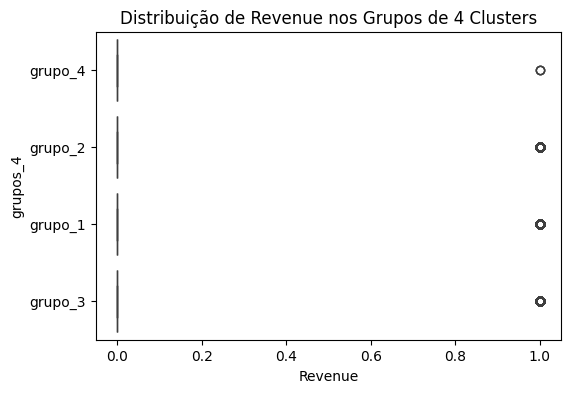

In [34]:
# Boxplot para a variável 'Revenue' nos grupos de 4 clusters
plt.figure(figsize=(6, 4))
sns.boxplot(data=df3, y='grupos_4', x=df['Revenue'])
plt.title('Distribuição de Revenue nos Grupos de 4 Clusters')
plt.show()

In [35]:
# Crosstab para 'Revenue' nos grupos de 4 clusters
crosstab_4 = pd.crosstab(df['Revenue'], df3['grupos_4'])
crosstab_4

grupos_4,grupo_1,grupo_2,grupo_3,grupo_4
Revenue,,,,
False,2342,5516,2383,181
True,498,1141,266,3


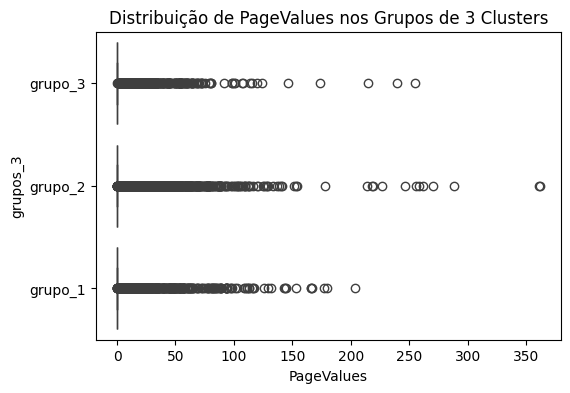

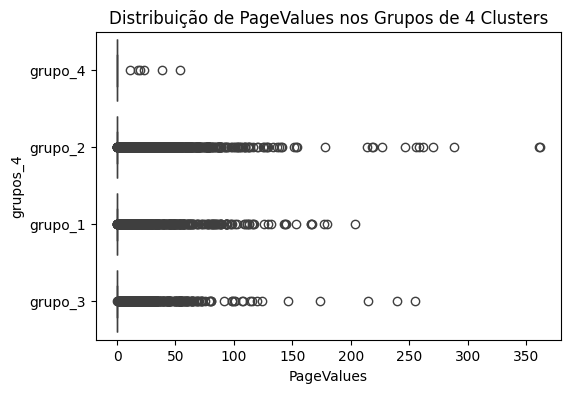

grupos_4,grupo_1,grupo_2,grupo_3,grupo_4
PageValues,,,,
0.000000,2158,5165,2099,178
0.038035,1,0,0,0
0.067050,0,1,0,0
0.093547,0,1,0,0
0.098621,0,1,0,0
...,...,...,...,...
261.491286,0,1,0,0
270.784693,0,1,0,0
287.953793,0,1,0,0


In [36]:
# Análise descritiva para outras variáveis
# Exemplo com 'PageValues' (substitua com outras variáveis relevantes conforme necessário)

# Boxplot para 'PageValues' nos grupos de 3 clusters
plt.figure(figsize=(6, 4))
sns.boxplot(data=df3, y='grupos_3', x=df['PageValues'])
plt.title('Distribuição de PageValues nos Grupos de 3 Clusters')
plt.show()

# Boxplot para 'PageValues' nos grupos de 4 clusters
plt.figure(figsize=(6, 4))
sns.boxplot(data=df3, y='grupos_4', x=df['PageValues'])
plt.title('Distribuição de PageValues nos Grupos de 4 Clusters')
plt.show()

# Crosstab para 'PageValues' nos grupos de 4 clusters
crosstab_pagevalues = pd.crosstab(df['PageValues'], df3['grupos_4'])
crosstab_pagevalues


### Análise

1. **Consistência e Homogeneidade**:
   - Os grupos nos agrupamentos de 3 e 4 clusters são bastante consistentes, especialmente os Grupos 1 e 2, que mostram uma distribuição estável para `Revenue` e `PageValues`.
   - A divisão do Grupo 3 em dois subgrupos no agrupamento de 4 clusters sugere a presença de subestruturas, mas `PageValues` e `Revenue` não diferenciam fortemente esses subgrupos.

2. **Nomes dos Grupos**:
   - **Grupo 1**: "Alta Receita" – Proporção significativa de `Revenue` True.
   - **Grupo 2**: "Alta Frequência" – Maior número de observações com `Revenue` False.
   - **Grupo 3**: "Receita Mista" – Combinação de `Revenue` True e False.
   - **Grupo 4**: "Outliers" – Observações com alta variabilidade em `BounceRates` e `PageValues`, e predominantemente `Revenue` False.



Com base na análise integrada dos boxplots e tabelas cruzadas, o agrupamento de **`3 clusters`** é suficiente e mais simples de interpretar, especialmente porque `PageValues` e `Revenue` não fornecem diferenciação significativa adicional no agrupamento de 4 clusters.

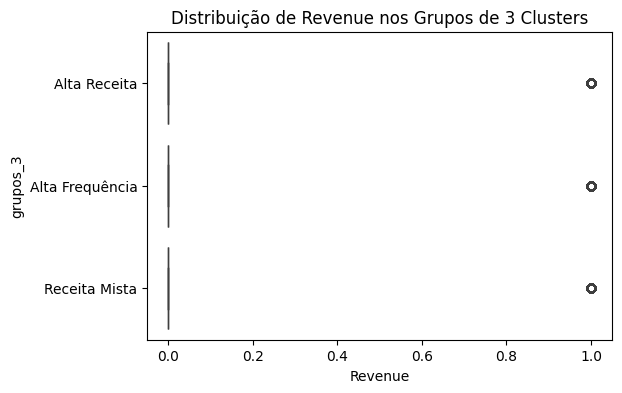

In [37]:
# Definir os nomes dos grupos para 3 clusters
nomes_grupos_3 = {1: "Alta Receita", 2: "Alta Frequência", 3: "Receita Mista"}

# Boxplot para 'Revenue' nos grupos de 3 clusters com nomes
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, y='grupos_3', x='Revenue')
plt.title('Distribuição de Revenue nos Grupos de 3 Clusters')
plt.yticks(ticks=[0, 1, 2], labels=[nomes_grupos_3[i] for i in sorted(nomes_grupos_3.keys())])
plt.show()

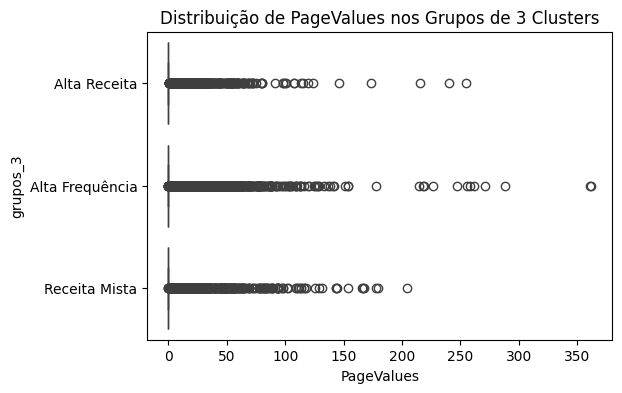

In [38]:
# Boxplot para 'PageValues' nos grupos de 3 clusters com nomes
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, y='grupos_3', x='PageValues')
plt.title('Distribuição de PageValues nos Grupos de 3 Clusters')
plt.yticks(ticks=[0, 1, 2], labels=[nomes_grupos_3[i] for i in sorted(nomes_grupos_3.keys())])
plt.show()

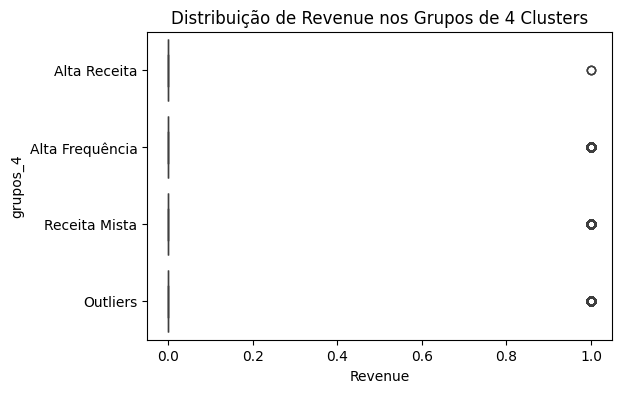

In [39]:
# Definir os nomes dos grupos para 4 clusters
nomes_grupos_4 = {1: "Alta Receita", 2: "Alta Frequência", 3: "Receita Mista", 4: "Outliers"}

# Boxplot para 'Revenue' nos grupos de 4 clusters com nomes
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, y='grupos_4', x='Revenue')
plt.title('Distribuição de Revenue nos Grupos de 4 Clusters')
plt.yticks(ticks=[0, 1, 2, 3], labels=[nomes_grupos_4[i] for i in sorted(nomes_grupos_4.keys())])
plt.show()

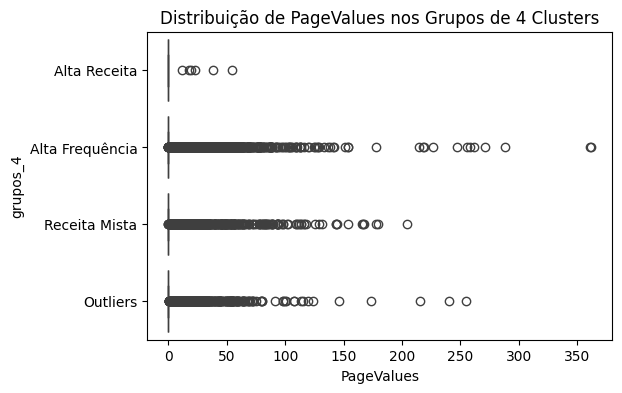

In [40]:
# Boxplot para 'PageValues' nos grupos de 4 clusters com nomes
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, y='grupos_4', x='PageValues')
plt.title('Distribuição de PageValues nos Grupos de 4 Clusters')
plt.yticks(ticks=[0, 1, 2, 3], labels=[nomes_grupos_4[i] for i in sorted(nomes_grupos_4.keys())])
plt.show()

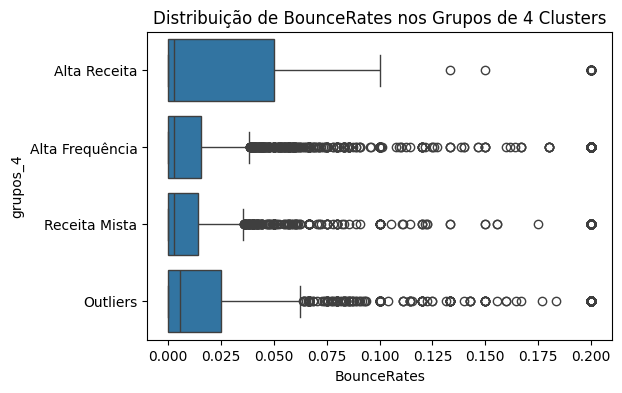

In [41]:
# Boxplot para 'BounceRates' nos grupos de 4 clusters com nomes
plt.figure(figsize=(6,4))
sns.boxplot(data=df3, y='grupos_4', x='BounceRates')
plt.title('Distribuição de BounceRates nos Grupos de 4 Clusters')
plt.yticks(ticks=[0, 1, 2, 3], labels=[nomes_grupos_4[i] for i in sorted(nomes_grupos_4.keys())])
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [42]:
# Proporção de clientes com Revenue True por grupo (3 clusters)
revenue_3 = df3.groupby('grupos_3')['Revenue'].mean()
print("Proporção de clientes com Revenue True nos grupos de 3 clusters:")
print(revenue_3)

Proporção de clientes com Revenue True nos grupos de 3 clusters:
grupos_3
grupo_1    0.175352
grupo_2    0.171399
grupo_3    0.094952
Name: Revenue, dtype: float64


In [43]:
# Proporção de clientes com Revenue True por grupo (4 clusters)
revenue_4 = df3.groupby('grupos_4')['Revenue'].mean()
print("Proporção de clientes com Revenue True nos grupos de 4 clusters:")
print(revenue_4)


Proporção de clientes com Revenue True nos grupos de 4 clusters:
grupos_4
grupo_1    0.175352
grupo_2    0.171399
grupo_3    0.100415
grupo_4    0.016304
Name: Revenue, dtype: float64


In [44]:
# Estatísticas descritivas de Bounce Rates por grupo (3 clusters)
bounce_rate_3 = df3.groupby('grupos_3')['BounceRates'].describe()
print("Estatísticas descritivas de Bounce Rates nos grupos de 3 clusters:")
bounce_rate_3


Estatísticas descritivas de Bounce Rates nos grupos de 3 clusters:


,count,mean,std,min,25%,50%,75%,max
grupos_3,,,,,,,,
grupo_1,2840.0,0.017663,0.041916,0.0,0.0,0.002546,0.014286,0.2
grupo_2,6657.0,0.020848,0.047513,0.0,0.0,0.002564,0.015385,0.2
grupo_3,2833.0,0.029887,0.055538,0.0,0.0,0.005556,0.026667,0.2


In [45]:
# Estatísticas descritivas de Bounce Rates por grupo (4 clusters)
bounce_rate_4 = df3.groupby('grupos_4')['BounceRates'].describe()
print("Estatísticas descritivas de Bounce Rates nos grupos de 4 clusters:")
bounce_rate_4


Estatísticas descritivas de Bounce Rates nos grupos de 4 clusters:


,count,mean,std,min,25%,50%,75%,max
grupos_4,,,,,,,,
grupo_1,2840.0,0.017663,0.041916,0.0,0.0,0.002546,0.014286,0.2
grupo_2,6657.0,0.020848,0.047513,0.0,0.0,0.002564,0.015385,0.2
grupo_3,2649.0,0.028697,0.053616,0.0,0.0,0.005607,0.025000,0.2
grupo_4,184.0,0.047021,0.076307,0.0,0.0,0.002504,0.050000,0.2



### Identificação do Grupo com Clientes Mais Propensos à Compra

- **Agrupamento de 3 Clusters**:
  - O **Grupo 1 ("Alta Receita")** possui a maior proporção de clientes com *Revenue* True (17.55%) e uma das menores médias de *Bounce Rate* (0.0177), indicando que este grupo é o mais propenso à compra.

- **Agrupamento de 4 Clusters**:
  - O **Grupo 1 ("Alta Receita")** também possui a maior proporção de clientes com *Revenue* True (17.55%) e uma das menores médias de *Bounce Rate* (0.0177), similar ao agrupamento de 3 clusters.
  - O **Grupo 2 ("Alta Frequência")** também apresenta uma alta proporção de clientes com *Revenue* True (17.14%) e uma baixa média de *Bounce Rate* (0.0208).

### Resumo Final

- **Grupo com Clientes Mais Propensos à Compra**:
  - Nos dois agrupamentos, o **Grupo 1 ("Alta Receita")** é consistentemente o grupo com a maior proporção de clientes propensos à compra e uma baixa taxa de rejeição, indicando um comportamento desejável em termos de propensão à compra e interação com o site.

Com essa análise, podemos concluir que o **Grupo 1 ("Alta Receita")** é o mais valioso em termos de clientes propensos à compra, tanto no agrupamento de 3 clusters quanto no de 4 clusters.